In [67]:
import sys, os

import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

from recursive_model import tree_lib
from utils import utils

In [52]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [53]:
df_raw = pd.read_csv('/home/vahidsanei_google_com/data/yelp_data/updated_large/business_with_corpus.csv')

In [54]:
df_raw.head()

,Unnamed: 0,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,url,webpage_text,is_eng,webpage_corpus
0,0,f9NumwFMBDn751xgFiRbNA,The Range At Lake Norman,10913 Bailey Rd,Cornelius,NC,28031,35.462724,-80.852612,3.5,36,1,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...","{'Monday': '10:0-18:0', 'Tuesday': '11:0-20:0'...",http://www.therangeatlakenorman.com/,"b'<!DOCTYPE html>\n<html lang=""en-US"">\n<head>...",True,Shooting Ranges Gun Rental Charlotte NC The Ra...
1,1,XNoUzKckATkOD1hP6vghZg,Felinus,3554 Rue Notre-Dame O,Montreal,QC,H4C 1P4,45.479984,-73.580070,5.0,5,1,NaN,"Pets, Pet Services, Pet Groomers",NaN,http://www.felinus.ca,"b'<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0...",False,NaN
2,2,51M2Kk903DFYI6gnB5I6SQ,USE MY GUY SERVICES LLC,4827 E Downing Cir,Mesa,AZ,85205,33.428065,-111.726648,4.5,26,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Home Services, Plumbing, Electricians, Handyma...","{'Monday': '0:0-0:0', 'Tuesday': '9:0-16:0', '...",https://www.usemyguyservices.com,"b'<!DOCTYPE html>\n<html lang=""en-US"" prefix=""...",True,Home Renovations and Repairs Phoenix AZ Home U...
3,3,cKyLV5oWZJ2NudWgqs8VZw,Oasis Auto Center - Gilbert,"1720 W Elliot Rd, Ste 105",Gilbert,AZ,85233,33.350399,-111.827142,4.5,38,1,{'BusinessAcceptsCreditCards': 'True'},"Auto Repair, Automotive, Oil Change Stations, ...","{'Monday': '7:0-18:0', 'Tuesday': '7:0-18:0', ...",http://oasisautocenter.net,"b'<!DOCTYPE html>\n<html lang=""en-US"" prefix=""...",True,Home Oasis Auto CenterOasis Auto Center Pages ...
4,4,ScYkbYNkDgCneBrD9vqhCQ,Junction Tire & Auto Service,6910 E Southern Ave,Mesa,AZ,85209,33.393885,-111.682226,5.0,18,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Auto Repair, Oil Change Stations, Automotive, ...","{'Monday': '7:30-17:0', 'Tuesday': '7:30-17:0'...",http://junctiontire.net/tires-auto-repair-mesa-az,"b'<!DOCTYPE html>\r\n<html lang=""en"">\r\n<head...",True,Contact Junction Tire Tires Auto Repair Shop i...


In [ ]:
df_raw.info()

In [191]:
df = utils.unify_yelp_data_classes(df_raw)

In [192]:
df = utils.clean_corpus(df, col_name='webpage_corpus')

In [193]:
df = utils.remove_not_loaded_websites(df)

In [194]:
df.columns

Index(['Unnamed: 0', 'business_id', 'name', 'address', 'city', 'state',
       'postal_code', 'latitude', 'longitude', 'stars', 'review_count',
       'is_open', 'attributes', 'categories', 'hours', 'url', 'webpage_text',
       'is_eng', 'webpage_corpus'],
      dtype='object')

In [195]:
len(df)

31202

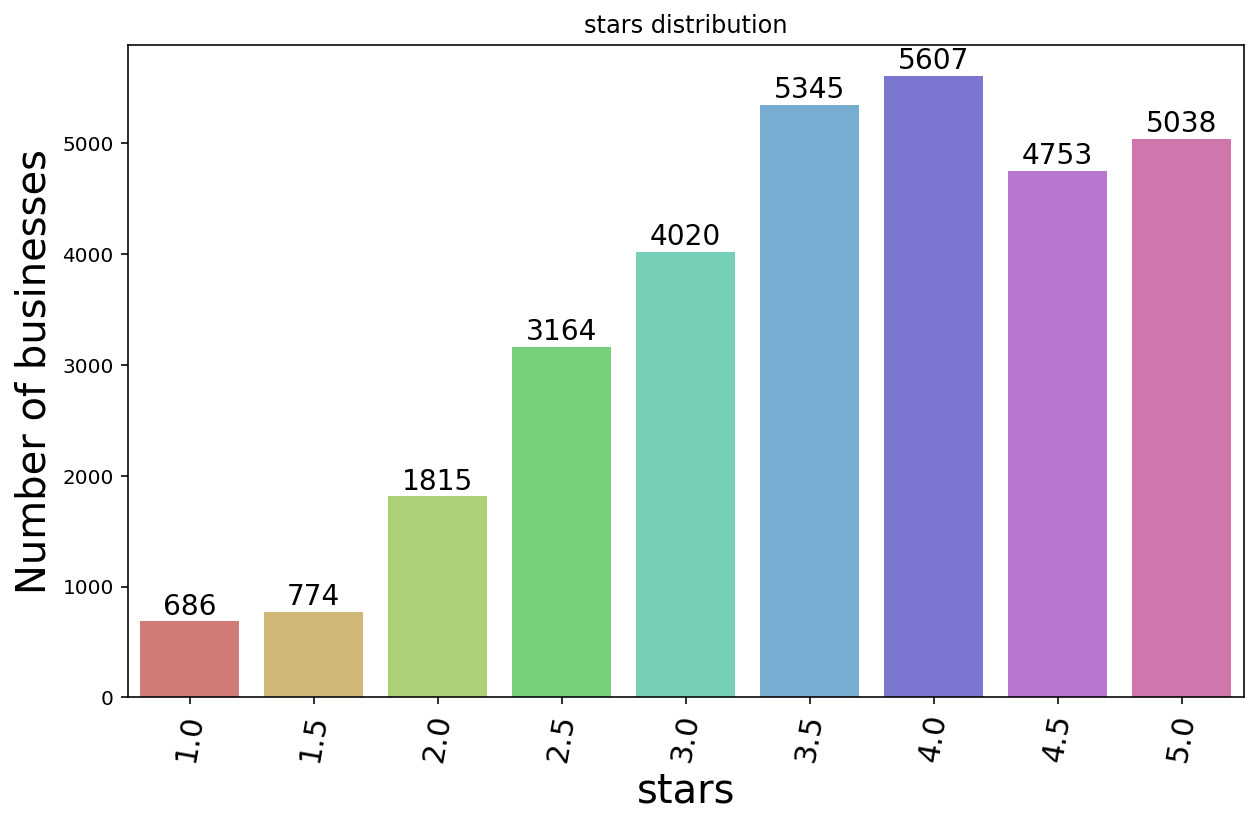

In [196]:
utils.plot_classes_distribution(df, 'stars')

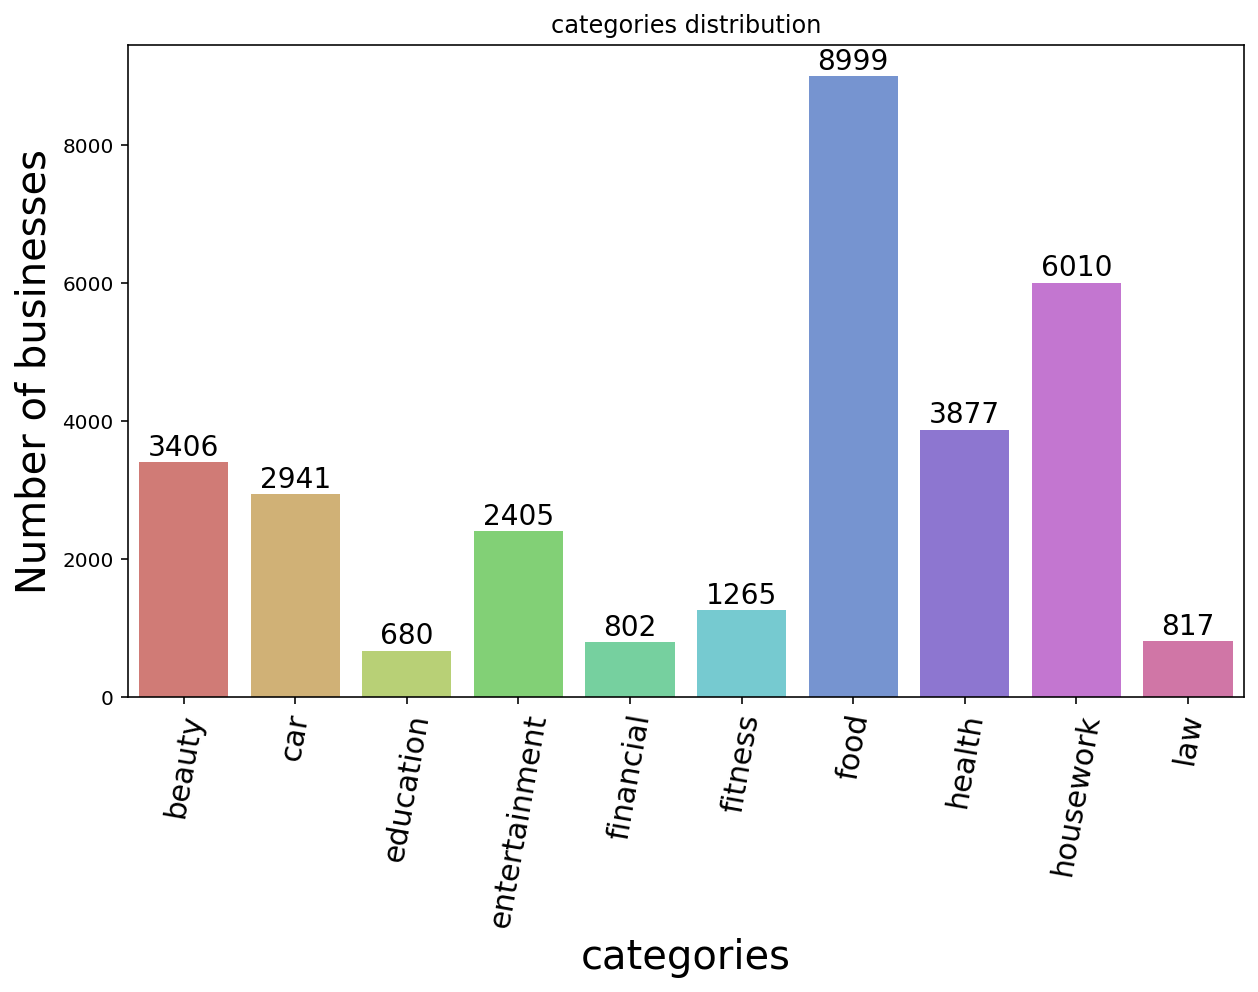

In [197]:
utils.plot_classes_distribution(df, 'categories')

### Generate encoded trees
Here, we generate encoded trees by converting an HTML to an encoded tree. This function accepts the maximum depth by _max\_depth_ by which it encodes the HTML such that the maximum depth and maximum branches (i.e. maximum number of children) can be up to _max\_depth_.

In [221]:
depth = 4
label_colname='stars'
is_multicase = True if label_colname == 'categories' else False

In [222]:
test = tree_lib.add_encoded_trees_to_dataframe(test, label_colname=label_colname, max_depth=depth, is_multicase=is_multicase)

4it [00:00, 32.98it/s]

[1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]


500it [00:19, 25.11it/s]


In [225]:
cnt = 0
for _, entry in test.iterrows():
    if cnt == 10: break
    cnt += 1
    print(entry['encoded_tree'][-100:], entry['url'])

ces Contact Us Privacy Policy Site Map)(Lic. No. 960007 & 960008 2020 All Rights Reserved.))))->2.5
 http://ateamunlimited.com/
 Contact Collins Cleaners Pickup & Delivery News & Updates Copyright 2020 Collins Cleaners))))->3.5
 http://collinscleaners.com
10:00pm Welcome Our Story Our Favorites Food Delivery Contact Website Designed by Narratent)))->4.5
 http://woodnhogbarbecue.com
OTO INC. Powered by Create your own unique website with customizable templates. Get Started)))->4.0
 http://yuisushi.com/index.html
: By Appointment OnlyCopyright 2018 Superior Grout & Concrete Pumping - All Rights Reserved.))->3.5
 https://superiorgrout.com
c. Limited time only. Valid at participating locations only. | Terms of Use | Privacy Policy))->2.0
 https://locations.rallys.com/oh/cleveland/1481-west-117th-street/?utm_source=Yelp
ontact About Privacy Sitemap Advertising Disclaimers www.kia.com Facebook Twitter Instagram)))->2.0
 http://www.southhillsauto.com
440-625-3080 Copyright 2020, Restaurant De

In [ ]:
df = tree_lib.add_encoded_trees_to_dataframe(df, label_colname=label_colname, max_depth=depth, is_multicase=is_multicase)

### Mean wordcounts per leaf
Here, we find the average number of words per leaves among all trees from out input data.

In [201]:
sum, n = 0, 0
for tree_str in df['encoded_tree']:
    wc, nl = tree_lib.median_wordcounts(tree_str)
    if nl > 0:
        sum += wc / nl
        n += 1
print(f'Median words per leaf = {sum / n}')

Median words per leaf = 238.19222357286748


In [202]:
for itr in range(5):
    df = df.sample(frac=1).reset_index(drop=True)
    train, test = utils.get_train_test(df, split_size_ratio=0.7)
    directory = os.path.dirname(f'/home/vahidsanei_google_com/data/yelp_data/oversampled_depth={depth}/{label_colname}/shuffle{itr}/')
    if not os.path.exists(directory):
        os.makedirs(directory)
    train = utils.oversampling(train, col_name=label_colname)
    train.to_csv(os.path.join(directory, 'train.csv'), index=False)
    test.to_csv(os.path.join(directory, 'test.csv'), index=False)

Max count = 3861 Min Count = 481
Max count = 3928 Min Count = 483
Max count = 3960 Min Count = 485
Max count = 3956 Min Count = 492
Max count = 3908 Min Count = 485


In [203]:
cnt = 0
for tree_str in df['encoded_tree']:
    cnt += 1
    if cnt == 10: break
    tree = tree_lib.Tree(tree_str)
    print(tree.label, tree_str[-5:-1])

2.5 >2.5
3.5 >3.5
4.5 >4.5
4.0 >4.0
3.5 >3.5
2.0 >2.0
2.0 >2.0
4.5 >4.5
3.5 >3.5


In [ ]:
sum_d, sum_b = 0, 0
for html in df['webpage_text']:
    d, b = tree_lib.get_html_depth_branches(html)
    sum_d += d
    sum_b += b

In [166]:
n = len(df['webpage_text'])
print(f'Avg max depth = {sum_d / n}, Avg max branches = {sum_b / n}')

Avg max depth = 18.53236971988975, Avg max branches = 43.1758541119159


### Oversampling with limit
We can pass a parameter _limit_ to function __utils.oversampling__ to put a constraint on the size of entries for each class. We can think of it as a sort of combination oversampling and downsampling. 

In [64]:
limit=2500

In [65]:
for itr in range(5):
    df = df.sample(frac=1).reset_index(drop=True)
    train, test = utils.get_train_test(df, split_size_ratio=0.8)
    directory = os.path.dirname(f'/home/vahidsanei_google_com/data/yelp_data/oversampled_limit={limit}/{label_colname}/shuffle{itr}/')
    if not os.path.exists(directory):
        os.makedirs(directory)
    train = utils.oversampling(train, col_name=label_colname, limit=limit)
    train.to_csv(os.path.join(directory, 'train.csv'), index=False)
    test.to_csv(os.path.join(directory, 'test.csv'), index=False)

Max count = 7173 Min Count = 548
Max count = 7246 Min Count = 550
Max count = 7150 Min Count = 544
Max count = 7210 Min Count = 565
Max count = 7196 Min Count = 548
